In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from scipy import stats
from scipy.stats import linregress

In [2]:
path = r'/Users/bryanleavelle/DATA PROJECTS/water-level-predict/'

In [3]:
df = pd.read_csv(os.path.join(path, 'epa-sea-level.csv'))

In [4]:
df.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
# look for mixed data types

for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
  else:
    print('all good')

all good
all good
all good
all good
all good


In [6]:
# check for missing values

df.isnull().sum()

Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64

NOAA Adjusted Sea Level is basically all NaN, and it is not used in the assignment. Lets remove it.

In [7]:
del df['NOAA Adjusted Sea Level']

In [8]:
for col in df:
    print (col)

Year
CSIRO Adjusted Sea Level
Lower Error Bound
Upper Error Bound


nice

In [9]:
# check for dups

df_dups = df[df.duplicated()]

In [10]:
df_dups

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound


## hell ya lookin good. On to the assignment

# TASK 1:
### import the data

Already done! NEXT

# TASK 2: 
### Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

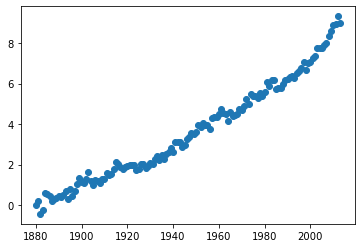

In [11]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

Nice. I mean, scary. Next!

# TASK 3:
### Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [12]:
#save variables with new names for easier handling in scipy

x = df['Year']
y = df['CSIRO Adjusted Sea Level']

In [13]:
# new date range for predictive line

future_predict = np.arange(1880, 2051, 1)

In [97]:
# calculate regression

res = linregress(x, y)

In [98]:
# check slope

res.slope

0.0630445840121348

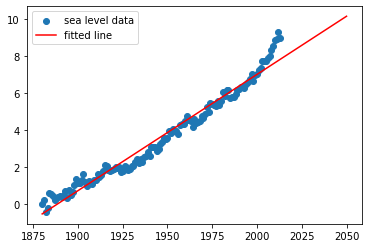

In [118]:
# plot the line and data

plt.scatter(x, y, label = 'sea level data')
plt.plot(future_predict, res.intercept + res.slope*future_predict, 'r', label='fitted line')
plt.legend()
plt.show()

## boom. 
next

# TASK 4: Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 
### Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [101]:
# new df with desired years only

df2 = df[df['Year'].between(2000, 2013)]

In [102]:
# new x var

x2 = df2['Year']

In [103]:
#new y var

y2 = df2['CSIRO Adjusted Sea Level']

In [104]:
#regression for new data

res2 = linregress(x2,y2)

In [110]:
# check that slope is different
res2.slope

0.1664272733318682

### sweet.

In [111]:
# new ticks for graph

future_predict2 = np.arange(2000, 2051, 1)

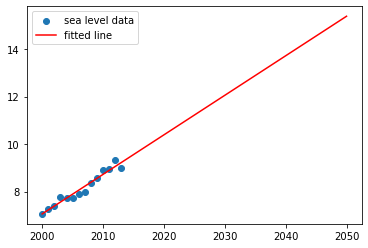

In [107]:
plt.scatter(x2, y2, label = 'sea level data')
plt.plot(future_predict2, res2.intercept + res2.slope*future_predict2, 'r', label='fitted line')
plt.legend()
plt.show()

# niiice. Lets bring the two charts together, shall we?

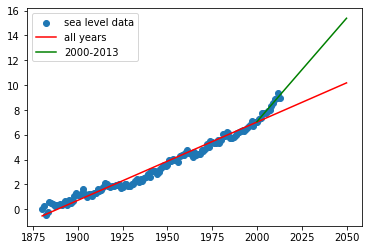

In [117]:
plt.scatter(x, y, label = 'sea level data')
plt.plot(future_predict, res.intercept + res.slope*future_predict, 'r', label='all years')
plt.plot(future_predict2, res2.intercept + res2.slope*future_predict2, 'g', label='2000-2013')
plt.legend()
plt.show()

# and that does it for the freecodecamp.org excercises. Good times!